In [ ]:
import pandas as pd
import numpy as nd
import statistics as sts
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import (train_test_split,cross_val_score)
from imblearn.metrics import specificity_score
from sklearn import metrics
from sklearn.metrics import (cohen_kappa_score, confusion_matrix, accuracy_score,
precision_score, recall_score, f1_score,roc_auc_score, roc_curve, auc, r2_score,classification_report)
!pip install dataprep


In [ ]:
df = pd.read_csv('./base/dados.csv')
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.shape

(69976, 12)

In [ ]:
df.columns = ['idade','genero','altura','peso','p_sistolica','p_diastolica',
             'colesterol','glicose','fumante','bebida_alcool','ativo','cardio']

In [ ]:
df.shape

(69976, 12)

In [ ]:
df.head()

,idade,genero,altura,peso,p_sistolica,p_diastolica,colesterol,glicose,fumante,bebida_alcool,ativo,cardio
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69976 entries, 0 to 69975
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   idade          69976 non-null  int64  
 1   genero         69976 non-null  int64  
 2   altura         69976 non-null  int64  
 3   peso           69976 non-null  float64
 4   p_sistolica    69976 non-null  int64  
 5   p_diastolica   69976 non-null  int64  
 6   colesterol     69976 non-null  int64  
 7   glicose        69976 non-null  int64  
 8   fumante        69976 non-null  int64  
 9   bebida_alcool  69976 non-null  int64  
 10  ativo          69976 non-null  int64  
 11  cardio         69976 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 6.4 MB


In [ ]:
df.isnull().sum()

idade            0
genero           0
altura           0
peso             0
p_sistolica      0
p_diastolica     0
colesterol       0
glicose          0
fumante          0
bebida_alcool    0
ativo            0
cardio           0
dtype: int64

In [ ]:
df.skew()

idade            -0.307076
genero            0.630605
altura           -0.642142
peso              1.011633
p_sistolica      85.281695
p_diastolica     32.108622
colesterol        1.586588
glicose           2.396858
fumante           2.905204
bebida_alcool     3.955803
ativo            -1.529392
cardio            0.000915
dtype: float64

In [ ]:
df.kurt()

idade              -0.823501
genero             -1.602383
altura              7.941495
peso                2.585593
p_sistolica      7577.487566
p_diastolica     1425.428849
colesterol          0.992126
glicose             4.291350
fumante             6.440396
bebida_alcool      13.648769
ativo               0.339048
cardio             -2.000056
dtype: float64

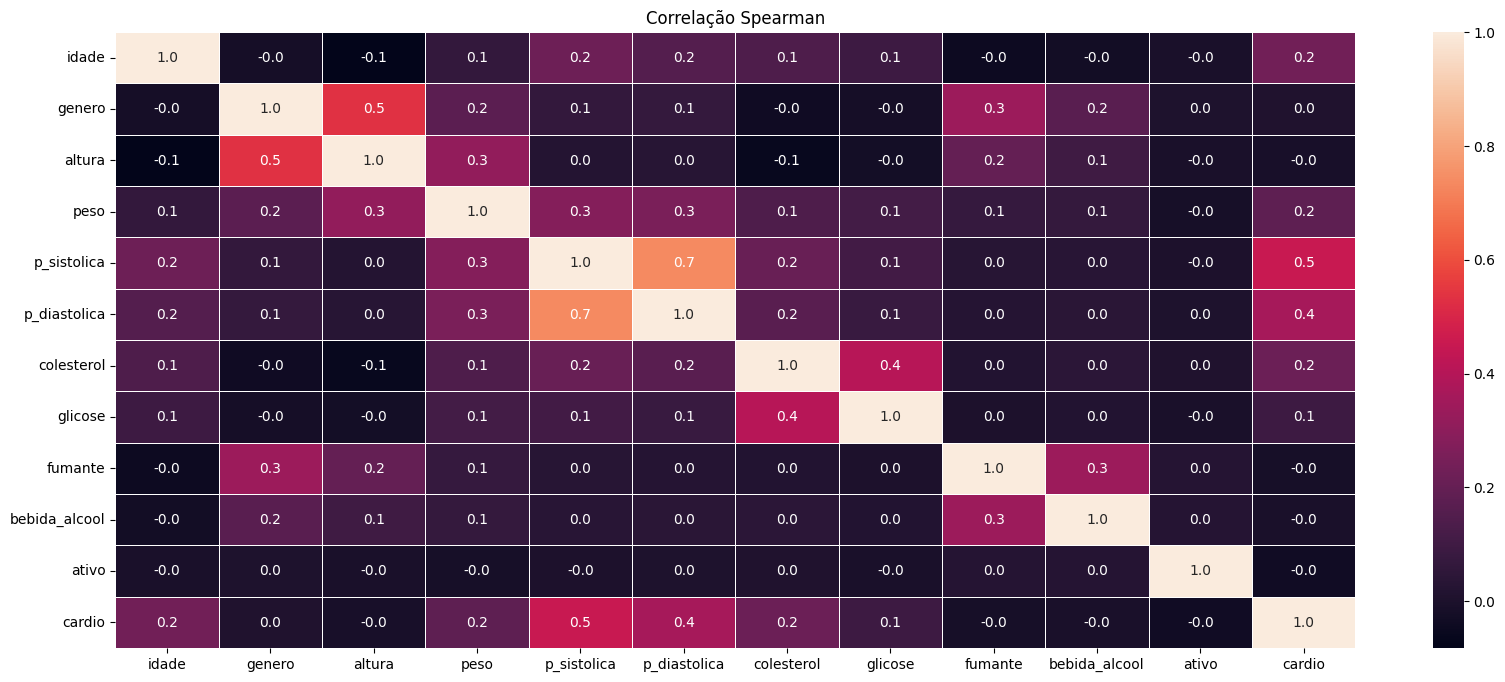

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
ax = sns.heatmap(df.corr(method='spearman'), annot = True, fmt=".1f", linewidths=.6)
ax.set_title('Correlação Spearman')
plt.show()

In [ ]:
'''
def insideStdDevs(col: str, stddevs: int = 2):
    μ = sts.mean(df[col])
    desv = sts.stdev(df[col])
    desv
    df.drop(df[df[col] > μ + (desv * stddevs)].index, inplace=True)
    df[df[col] > μ + (desv * stddevs)]
    df.drop(df[df[col] < μ - (desv * stddevs)].index, inplace=True)
    df[df[col] < μ - (desv * stddevs)] '''

from sklearn.utils import resample

#df.reset_index()

mask = df['fumante'] == 1
surv_df = df[mask]
death_df = df[~mask]

df_upsample = resample(surv_df, replace=True, n_samples=len(death_df), random_state=1337)
df = pd.concat([death_df,df_upsample])

mask = df['ativo'] == 0
surv_df = df[mask]
death_df = df[~mask]

df_upsample = resample(surv_df, replace=True, n_samples=len(death_df), random_state=1337)
df = pd.concat([death_df,df_upsample])







In [ ]:
print(f'{df.fumante.value_counts()}\n{df.ativo.value_counts()}')

fumante
0    108311
1    100447
Name: count, dtype: int64
ativo
1    104379
0    104379
Name: count, dtype: int64


In [ ]:
df.to_csv("fumante_e_ativo_upsample.csv")

In [ ]:
mask = df['ativo'] == 0
surv_df = df[mask]
death_df = df[~mask]

df_upsample = resample(surv_df, replace=True, n_samples=len(death_df), random_state=1337)
df = pd.concat([death_df,df_upsample])


In [ ]:

'''cols = ["colesterol", "glicose", "fumante", "bebida_alcool", "ativo"]
for col in cols:
    temp = pd.get_dummies(df[col], dtype=int)
    possible = []
    for item in df[col]:
        if not(item in possible):
            possible.append(item)
        else:
            pass
    for i in possible:
        df[f"{col}_{i}"] = temp[i]
    df.drop(columns=col, inplace=True)

df'''

from dataprep.eda import create_report
create_report(df).show_browser()

  0%|          | 0/1611 [00:00<?, ?it/s]

/home/codespace/.python/current/lib/python3.10/site-packages/dask/core.py:127: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))
error happended in column:genero


KeyError: 'genero'

In [ ]:
'''from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(X=df)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = df.columns
df_scaled''' #Iria usar, mas nao funcionou
e

In [ ]:
X = df.drop(columns=["cardio"])
y = df["cardio"]


In [ ]:
X

In [ ]:
xtr, xts, ytr, yts = train_test_split(X, y, test_size=0.3, random_state=1337)

In [ ]:
xtr

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=1337)
xtr_resampled, ytr_resampled = ros.fit_resample(xtr, ytr)


In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(xtr, ytr)

In [ ]:
nb.score(xts, yts)

In [ ]:
y_pr = nb.predict(xts)

In [ ]:
#Acurácia, Sensibilidade positiva (VP/(VP+FN),  Precisão, Recall, F1-Score
acuracia = accuracy_score(yts,y_pr)
precisao = precision_score(yts,y_pr)
recall = recall_score(yts,y_pr)
specificity = specificity_score(yts,y_pr)
f1Score = f1_score(yts,y_pr)
lr_curva_roc = roc_auc_score(yts,y_pr)
kappa = cohen_kappa_score(yts,y_pr)
print(f'Acurácia:{round(acuracia,2)}')
print(f'Precisão:{round(precisao,2)}')
print(f'Recall ou Sensibilidade:{round(recall,2)}')
print(f'Especificidade:{round(specificity,2)}')
print(f'F1-Score:{round(f1Score,2)}')
print(f'Kappa:{round(kappa,2)}')
print(f'Curva ROC:{round(lr_curva_roc,2)}') 